In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import statistics

In [18]:
folder = '~/workspace/Ploting/PhD_Thesis/Calibration/ParameterMap/'

# Run 900122 - 1000 mV Muon Run

In [19]:
inf_900122 = 'systematics_results_Run-900122_full_run.csv'

In [20]:
df_900122 = pd.read_csv(folder+inf_900122)
df_900122.tail()

,Unnamed: 0,WaveformDecomposition.stop_methode,WaveformDecomposition.stop_region,WaveformDecomposition.threshold,WaveformDecomposition.fwhm,WaveformDecomposition.search_range,WaveformDecomposition.search_edge,MipTimeRetrieval.window_threshold,MipTimeRetrieval.window_length,MipTimeRetrieval.timing_type,MipTimeRetrieval.constant_fraction,MipTimeRetrieval.pe_hit_time,SystematicsStudy.threshold_tres,SystematicsStudy.range_time,MPV_1,MPV_2,MPV_3,MPV_4,TRes,TRes_shift
17275,17275,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.5,10,0.394159,0.366676,0.369423,0.260528,1.366060,-0.114005
17276,17276,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,4,0.394159,0.366676,0.369423,0.260528,1.053474,-0.242250
17277,17277,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,6,0.394159,0.366676,0.369423,0.260528,1.059739,-0.247404
17278,17278,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,8,0.394159,0.366676,0.369423,0.260528,1.059453,-0.247265
17279,17279,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,10,0.394159,0.366676,0.369423,0.260528,1.059453,-0.247265


In [21]:
df_900122['WaveformDecomposition.threshold'].describe()

count    17280.000000
mean         2.500000
std          1.414254
min          0.500000
25%          1.500000
50%          2.500000
75%          3.500000
max          4.500000
Name: WaveformDecomposition.threshold, dtype: float64

In [22]:
df_900122 = df_900122.drop(['Unnamed: 0','WaveformDecomposition.stop_methode','WaveformDecomposition.stop_region','WaveformDecomposition.search_range','WaveformDecomposition.search_edge'], axis=1)

In [23]:
df_900122.columns

Index(['WaveformDecomposition.threshold', 'WaveformDecomposition.fwhm',
       'MipTimeRetrieval.window_threshold', 'MipTimeRetrieval.window_length',
       'MipTimeRetrieval.timing_type', 'MipTimeRetrieval.constant_fraction',
       'MipTimeRetrieval.pe_hit_time', 'SystematicsStudy.threshold_tres',
       'SystematicsStudy.range_time', 'MPV_1', 'MPV_2', 'MPV_3', 'MPV_4',
       'TRes', 'TRes_shift'],
      dtype='object')

In [24]:
# Physical values
df_900122 = df_900122[(df_900122['TRes']>=0) & (df_900122['TRes']<=1000)]

In [25]:
df_900122['TRes'].describe()

count    17280.000000
mean         1.504848
std          0.408515
min          0.857104
25%          1.221094
50%          1.404659
75%          1.696606
max          3.097197
Name: TRes, dtype: float64

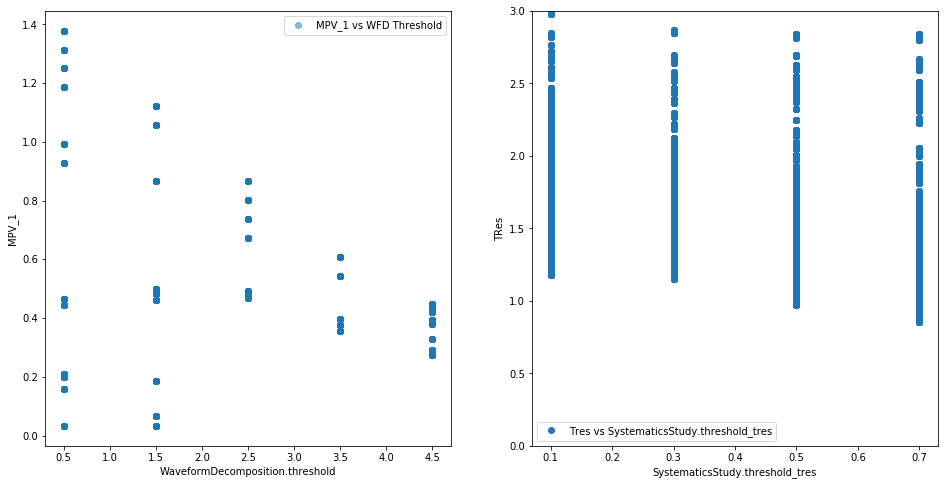

In [31]:
fig =plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
df_900122.plot(x='WaveformDecomposition.threshold',y='MPV_1', ax = ax, style='o', label='MPV_1 vs WFD Threshold', alpha=.5)
ax.set_xlabel('WaveformDecomposition.threshold')
ax.set_ylabel('MPV_1')
plt.legend()
ax2 = fig.add_subplot(122)
df_900122.plot(x='SystematicsStudy.threshold_tres',y='TRes', ax = ax2, style='o', label='Tres vs SystematicsStudy.threshold_tres', ylim=(0,3))
ax2.set_xlabel('SystematicsStudy.threshold_tres')
ax2.set_ylabel('TRes')
plt.legend()
plt.savefig(inf_900122[:-4]+'_MPV_1VsWDThres.pdf')

### Do some data cleaning

In [32]:
# Time
df_900122 = df_900122[(df_900122['TRes']>=0) & (df_900122['TRes']<=3)]
df_900122 = df_900122[(df_900122['SystematicsStudy.threshold_tres']<=0.5)]

In [33]:
# MPV
low = 0.5
up = 1.5
df_900122 = df_900122[(df_900122['MPV_1']>= low)&(df_900122['MPV_1']<= up)&(df_900122['MPV_2']>= low)&(df_900122['MPV_2']<= up)&(df_900122['MPV_3']>= low)&(df_900122['MPV_3']<= up)&(df_900122['MPV_4']>= low)& (df_900122['MPV_4'] <= up)]

In [52]:
print('TRes summary: ')
print(df_900122['TRes'].describe())
print('')
print('TRes_shift summary: ')
print(df_900122['TRes_shift'].describe())
print('')
print('MPV_1 summary: ')
print(df_900122['MPV_1'].describe())
print('')
print('MPV_2 summary: ')
print(df_900122['MPV_2'].describe())
print('')
print('MPV_3 summary: ')
print(df_900122['MPV_3'].describe())
print('')
print('MPV_4 summary: ')
print(df_900122['MPV_4'].describe())
print('')
print('Minimum time resolution:')
print( df_900122.ix[df_900122['TRes'].idxmin()] )
print('')

mpvs = []
for i in range(1,5):
    mpvs.append(df_900122.ix[df_900122['TRes'].idxmin()]['MPV_'+str(i)])
    
print('Mean correction factor:' + str(statistics.mean(mpvs)))
print('Std of correction factor:' + str(statistics.stdev(mpvs)))

TRes summary: 
count    5832.000000
mean        1.667794
std         0.450484
min         1.055855
25%         1.318224
50%         1.483660
75%         1.926073
max         2.868942
Name: TRes, dtype: float64

TRes_shift summary: 
count    5832.000000
mean       -0.374706
std         0.356941
min        -1.227284
25%        -0.610242
50%        -0.366442
75%        -0.134723
max         0.392187
Name: TRes_shift, dtype: float64

MPV_1 summary: 
count    5832.000000
mean        0.994694
std         0.190664
min         0.672995
25%         0.865302
50%         0.929405
75%         1.121712
max         1.378123
Name: MPV_1, dtype: float64

MPV_2 summary: 
count    5832.000000
mean        0.902864
std         0.254379
min         0.509093
25%         0.682594
50%         0.898680
75%         1.133055
max         1.367430
Name: MPV_2, dtype: float64

MPV_3 summary: 
count    5832.000000
mean        0.872517
std         0.173203
min         0.633422
25%         0.700089
50%         0.83342

/home/iwsatlas1/mgabriel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/iwsatlas1/mgabriel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


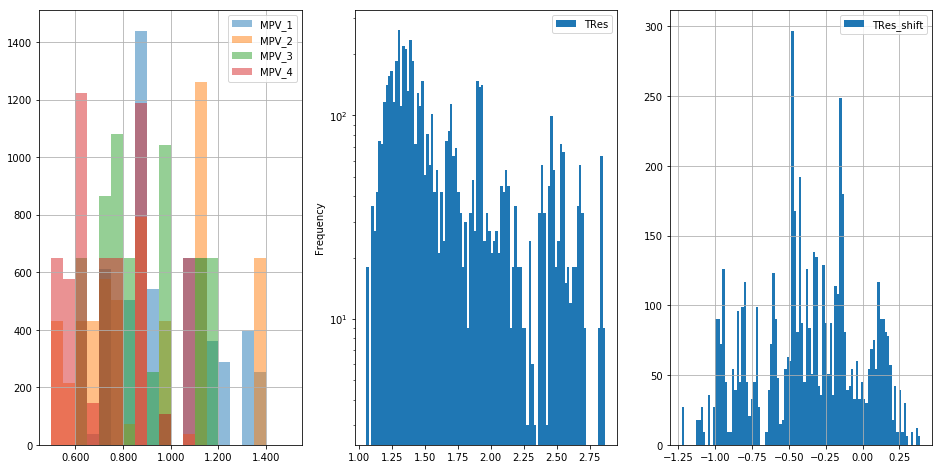

In [41]:
fig =plt.figure(figsize=(16,8))
ax = fig.add_subplot(131)
bins=20
df_900122['MPV_1'].hist(ax = ax, label='MPV_1', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV_2'].hist(ax = ax, label='MPV_2', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV_3'].hist(ax = ax, label='MPV_3', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV_4'].hist(ax = ax, label='MPV_4', alpha=.5,range=(low,up), bins=bins)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax2 = fig.add_subplot(132)
df_900122['TRes'].plot(kind='hist', ax = ax2, label='TRes', bins=100, logy=True)
#ax2.get_yaxis().get_major_formatter().set_useOffset(False)
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax3 = fig.add_subplot(133)
df_900122['TRes_shift'].hist(ax = ax3, label='TRes_shift', bins=100)
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

plt.savefig(inf_900122[:-4]+'_results.pdf')

### PE Hit time vs Constant fraction

count    2916.000000
mean        1.708501
std         0.506343
min         1.093034
25%         1.330894
50%         1.473062
75%         1.931394
max         2.868942
Name: TRes, dtype: float64


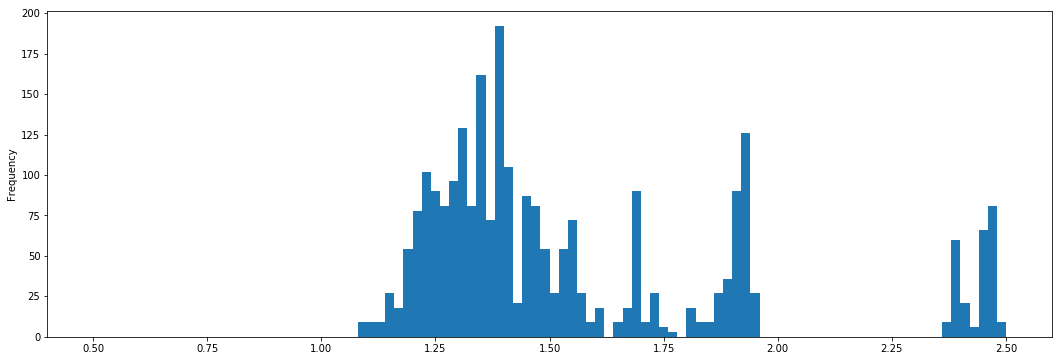

In [42]:
print(df_900122[df_900122['MipTimeRetrieval.timing_type']=='pe hit time']['TRes'].describe())
fig =plt.figure(figsize=(18,6))
df_900122[df_900122['MipTimeRetrieval.timing_type']=='pe hit time']['TRes'].plot(kind='hist', bins=100, range=(0.5,2.5))

count    2916.000000
mean        1.627088
std         0.382416
min         1.055855
25%         1.306025
50%         1.513335
75%         1.907588
max         2.716954
Name: TRes, dtype: float64


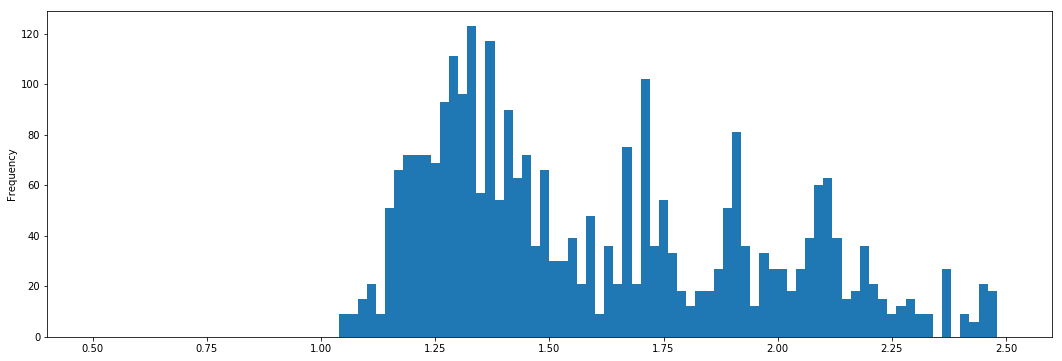

In [43]:
print(df_900122[df_900122['MipTimeRetrieval.timing_type']=='constant fraction']['TRes'].describe())
fig =plt.figure(figsize=(18,6))
df_900122[df_900122['MipTimeRetrieval.timing_type']=='constant fraction']['TRes'].plot(kind='hist', bins=100, range=(0.5,2.5))

### Pairplot & Heatmap

<Figure size 432x288 with 0 Axes>

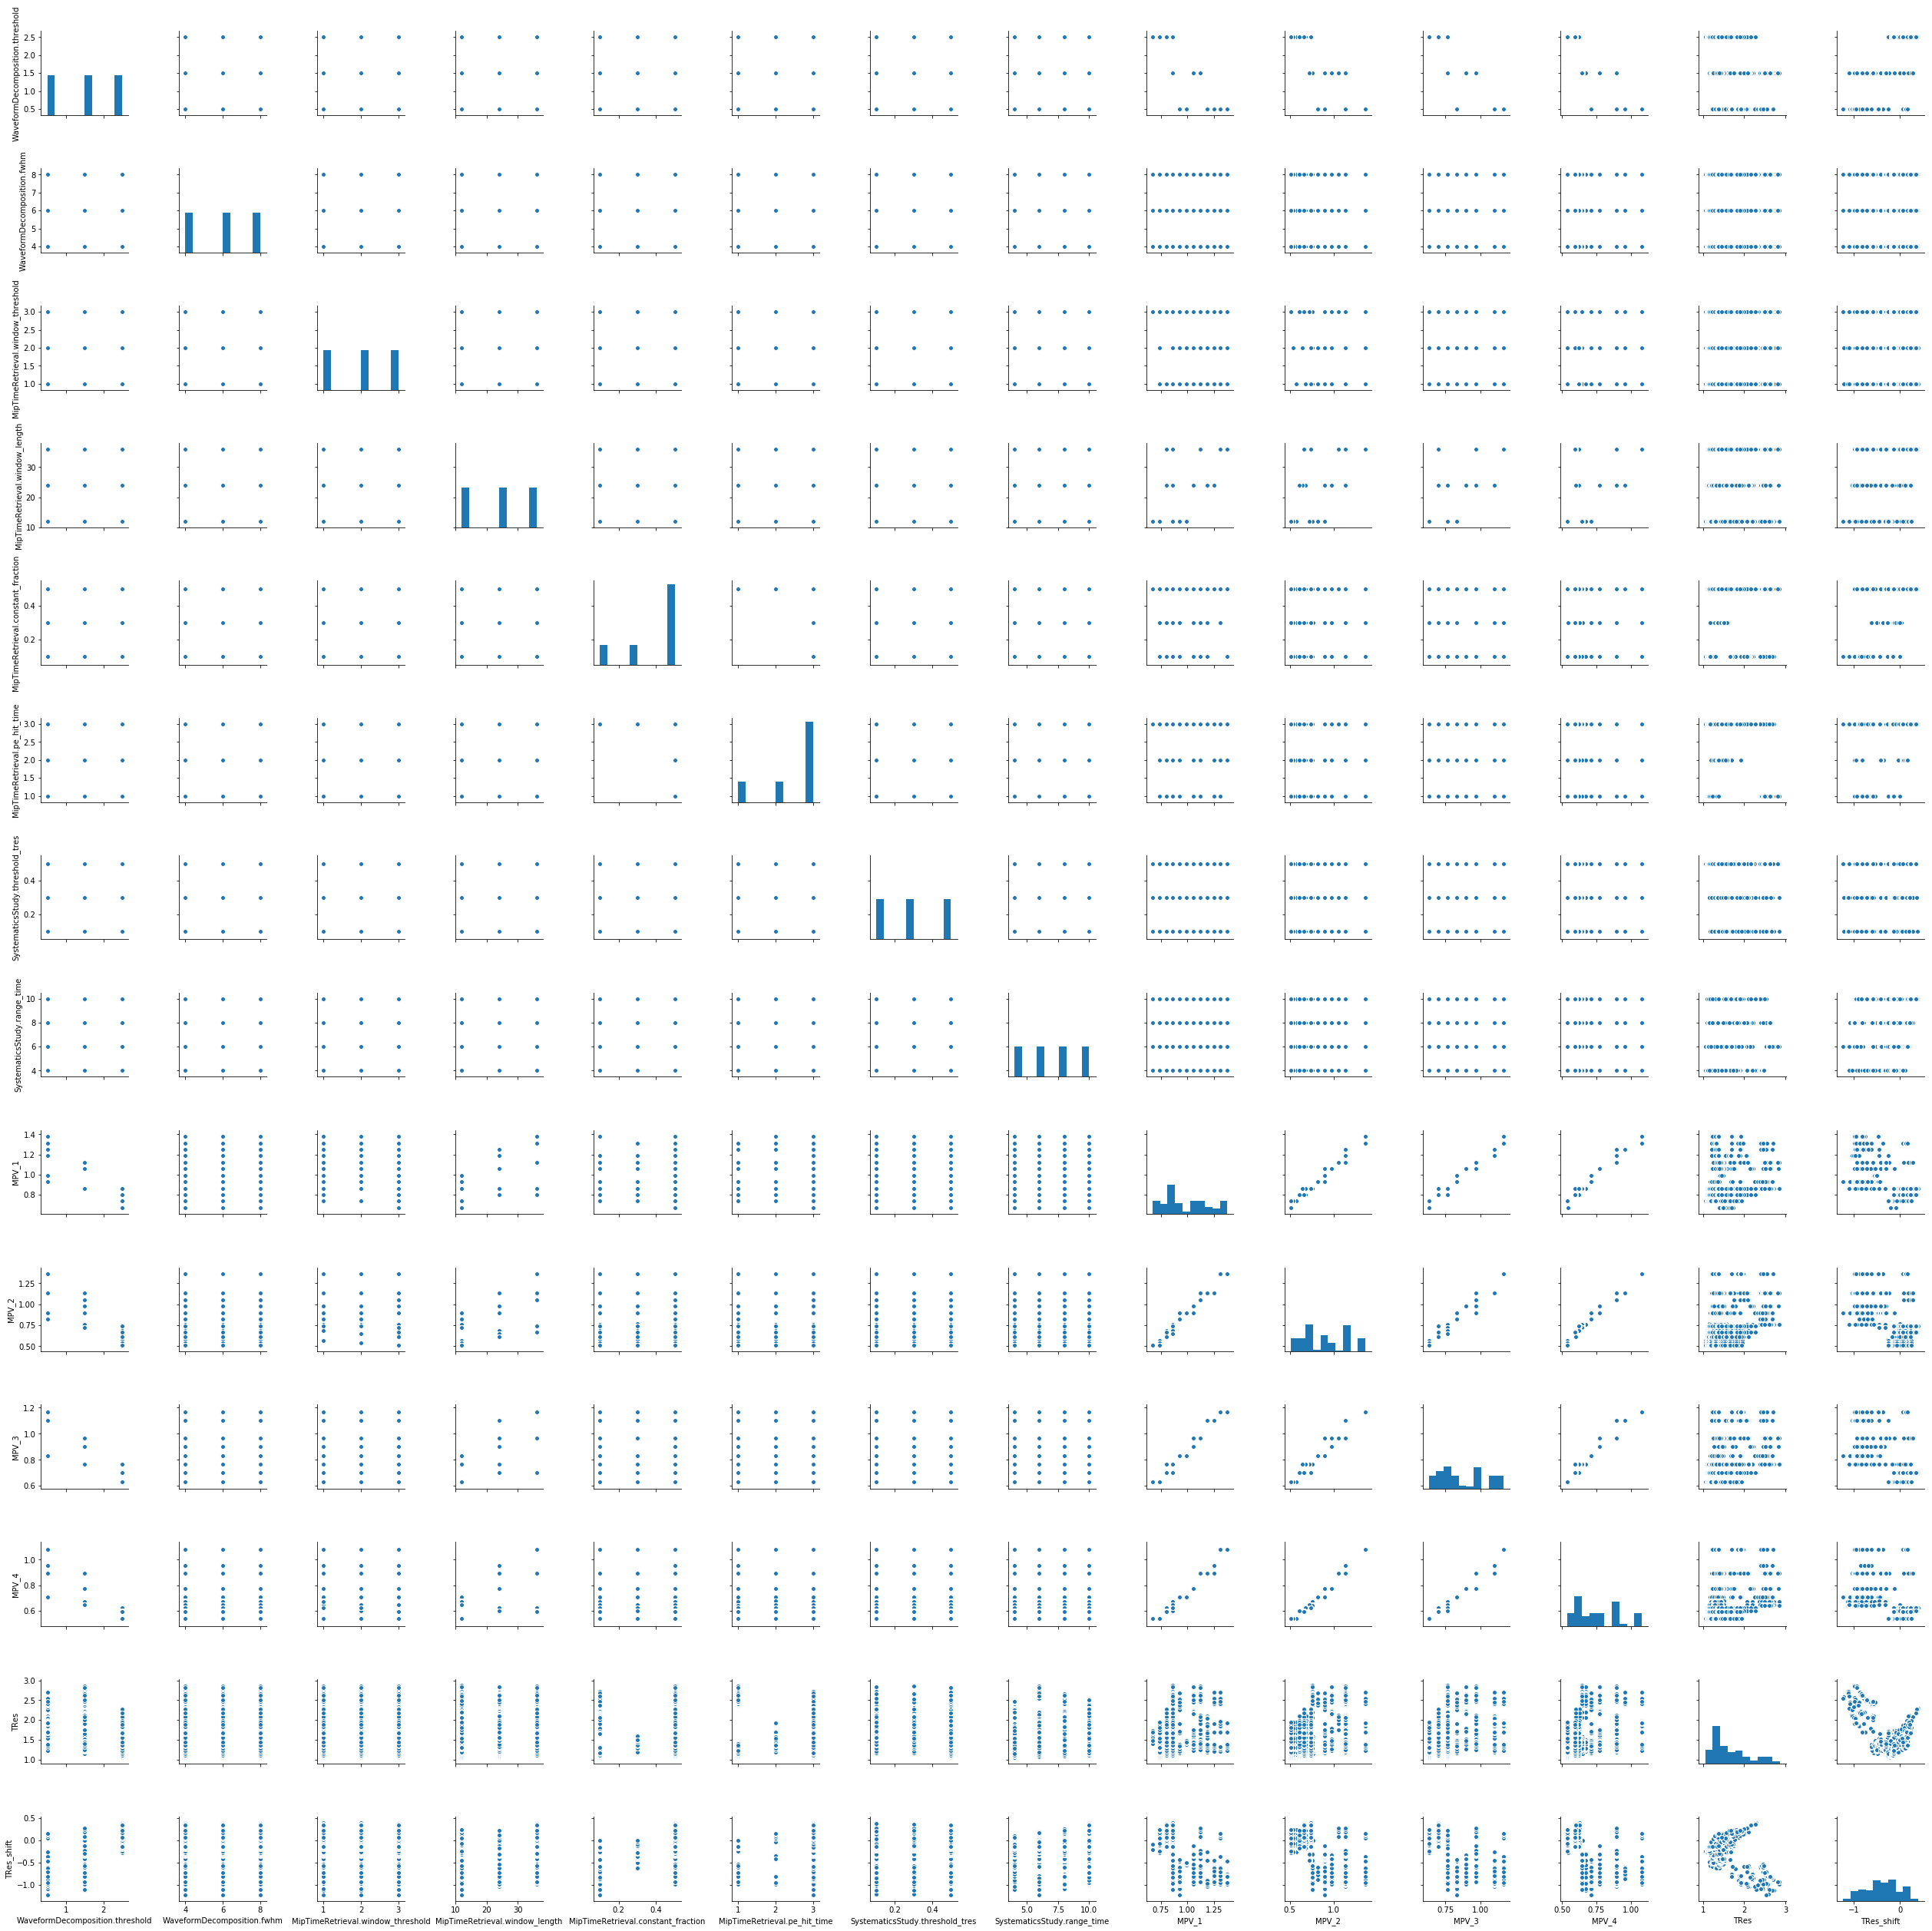

In [44]:
plt.figure()
#sns.pairplot(data=df,hue="Survived", dropna=True)2-Copy1
sns.pairplot(data=df_900122)
plt.savefig(inf_900122[:-4]+'_pairplot.pdf')

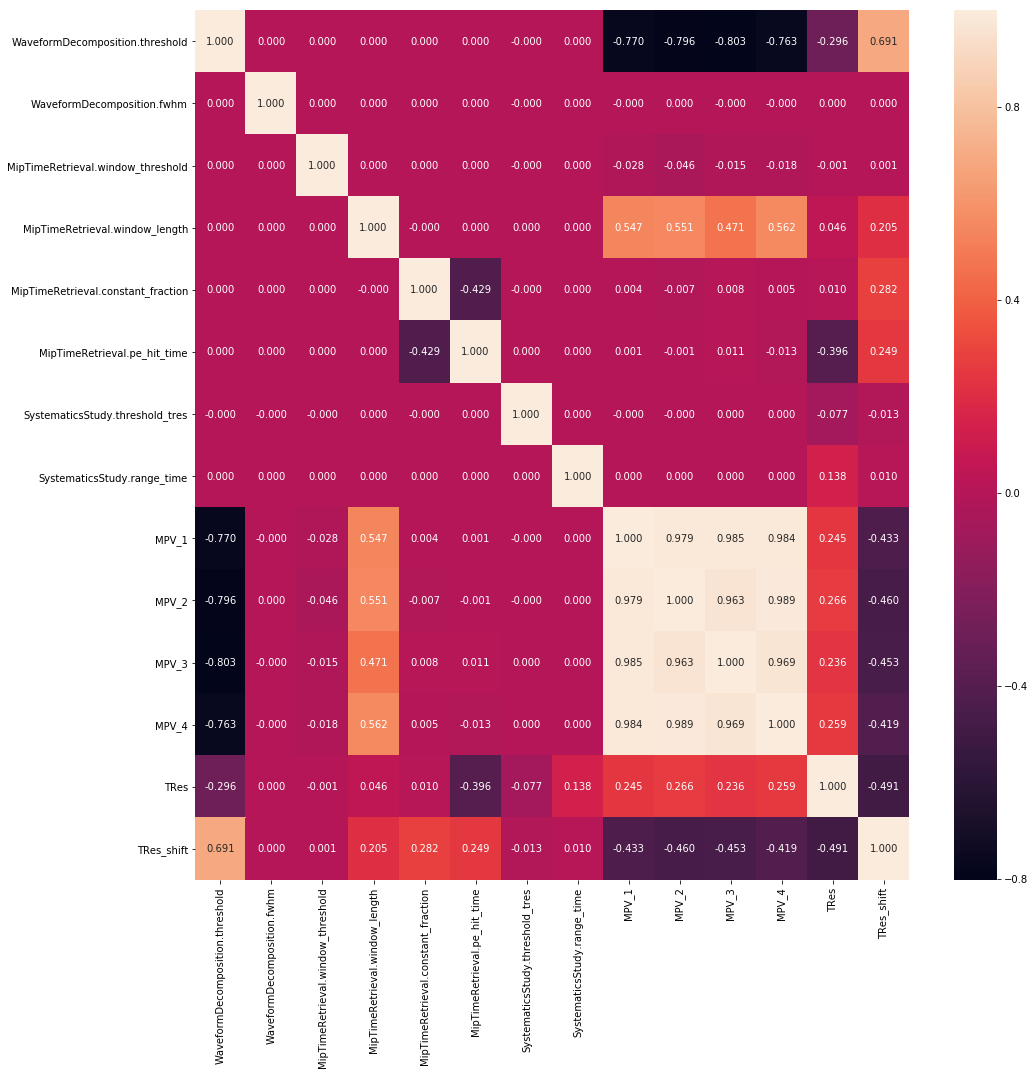

In [45]:
plt.figure(figsize=(16,16))
sns.heatmap(df_900122.corr(), annot=True, fmt=".3f")
plt.savefig(inf_900122[:-4]+'_heatmap.pdf')

In [55]:
plt.figure()
df_900122.plot(x='MipTimeRetrieval.window_threshold',y='MPV_1', ax = ax, style='o', label='MPV_1 vs WFD Window length', alpha=.5)

<Figure size 432x288 with 0 Axes>